In [1]:
import numpy as np
import pandas as pd

In [9]:
df=pd.read_csv("u.data.txt", sep="\t",header=None, names=["user_id","item_id","rating","timestamp"])

In [10]:
df.head()

,user_id,item_id,rating,timestamp
0,0,50,5,881250949
1,0,172,5,881250949
2,0,133,1,881250949
3,196,242,3,881250949
4,186,302,3,891717742


In [17]:
movies=pd.read_csv("Movie_id_Titles.txt")

In [18]:
movies.head()

,item_id,title
0,1,Toy Story (1995)
1,2,GoldenEye (1995)
2,3,Four Rooms (1995)
3,4,Get Shorty (1995)
4,5,Copycat (1995)


In [20]:
df.shape

(100003, 4)

In [21]:
### merge
merged_df=movies.merge(df,on="item_id")

In [23]:
merged_df.head()

,item_id,title,user_id,rating,timestamp
0,1,Toy Story (1995),308,4,887736532
1,1,Toy Story (1995),287,5,875334088
2,1,Toy Story (1995),148,4,877019411
3,1,Toy Story (1995),280,4,891700426
4,1,Toy Story (1995),66,3,883601324


In [27]:
merged_df.groupby(["title"])["rating"].count().sort_values(ascending=False).head(10)

title
Star Wars (1977)                 584
Contact (1997)                   509
Fargo (1996)                     508
Return of the Jedi (1983)        507
Liar Liar (1997)                 485
English Patient, The (1996)      481
Scream (1996)                    478
Toy Story (1995)                 452
Air Force One (1997)             431
Independence Day (ID4) (1996)    429
Name: rating, dtype: int64

In [30]:
ratings=pd.DataFrame(merged_df.groupby(["title"])["rating"].mean())

In [31]:
ratings.head()

,rating
title,
'Til There Was You (1997),2.333333
1-900 (1994),2.600000
101 Dalmatians (1996),2.908257
12 Angry Men (1957),4.344000
187 (1997),3.024390


In [32]:
ratings["total_ratings"]=merged_df.groupby(["title"])["rating"].count()

In [33]:
ratings.head()

,rating,total_ratings
title,,
'Til There Was You (1997),2.333333,9
1-900 (1994),2.600000,5
101 Dalmatians (1996),2.908257,109
12 Angry Men (1957),4.344000,125
187 (1997),3.024390,41


In [34]:
import matplotlib.pyplot as plt
%matplotlib inline

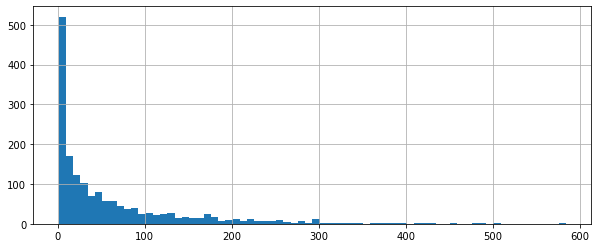

In [36]:
plt.figure(figsize=(10,4))
ratings["total_ratings"].hist(bins=70)

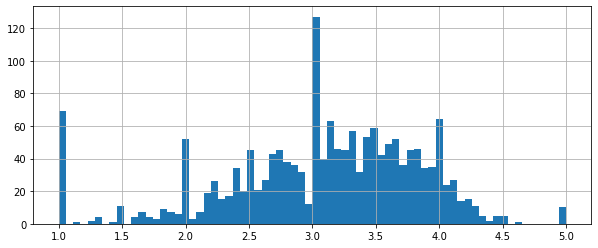

In [37]:
plt.figure(figsize=(10,4))
ratings["rating"].hist(bins=70)  ### majorly 3 is the ratings

In [39]:
ratings.sort_values("total_ratings", ascending=False).head(10)

,rating,total_ratings
title,,
Star Wars (1977),4.359589,584
Contact (1997),3.803536,509
Fargo (1996),4.155512,508
Return of the Jedi (1983),4.007890,507
Liar Liar (1997),3.156701,485
"English Patient, The (1996)",3.656965,481
Scream (1996),3.441423,478
Toy Story (1995),3.878319,452
Air Force One (1997),3.631090,431


## here we find a pivot table to find users and their corresponding rating

In [43]:
moviemat=merged_df.pivot_table(index="user_id",columns="title", values="rating")
moviemat

title,'Til There Was You (1997),1-900 (1994),101 Dalmatians (1996),12 Angry Men (1957),187 (1997),2 Days in the Valley (1996),"20,000 Leagues Under the Sea (1954)",2001: A Space Odyssey (1968),3 Ninjas: High Noon At Mega Mountain (1998),"39 Steps, The (1935)",...,Yankee Zulu (1994),Year of the Horse (1997),You So Crazy (1994),Young Frankenstein (1974),Young Guns (1988),Young Guns II (1990),"Young Poisoner's Handbook, The (1995)",Zeus and Roxanne (1997),unknown,Á köldum klaka (Cold Fever) (1994)
user_id,,,,,,,,,,,,,,,,,,,,,
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,2.0,5.0,NaN,NaN,3.0,4.0,NaN,NaN,...,NaN,NaN,NaN,5.0,3.0,NaN,NaN,NaN,4.0,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
939,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
940,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
941,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [53]:
### finding correlation with rating df and pivot table
## take a movie for its recommendation
starwars_r=moviemat["Star Wars (1977)"]
starwars_r.head()    ### user ratings

user_id
0    5.0
1    5.0
2    5.0
3    NaN
4    5.0
Name: Star Wars (1977), dtype: float64

In [45]:
## similar to starwars
similar_starwars=moviemat.corrwith(starwars_r)

C:\ProgramData\Anaconda3\lib\site-packages\numpy\lib\function_base.py:2526: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar)
C:\ProgramData\Anaconda3\lib\site-packages\numpy\lib\function_base.py:2455: RuntimeWarning: divide by zero encountered in true_divide
  c *= np.true_divide(1, fact)


In [55]:
### now df for starwars
starwars=pd.DataFrame(similar_starwars,columns=["Correlation"])
starwars.dropna(inplace=True)  ### always needed
starwars.head()
### higher correlation recommended when starwars watched
## need to be sorted

,Correlation
title,
'Til There Was You (1997),0.872872
1-900 (1994),-0.645497
101 Dalmatians (1996),0.211132
12 Angry Men (1957),0.184289
187 (1997),0.027398


In [56]:
starwars.sort_values("Correlation", ascending=False).head()

,Correlation
title,
Commandments (1997),1.0
Cosi (1996),1.0
No Escape (1994),1.0
Stripes (1981),1.0
Man of the Year (1995),1.0


In [49]:
starwars=starwars.join(ratings["total_ratings"])

In [50]:
starwars.head()
### now filter movies with less no of ratings, coz less numbe rof ratings may be highly positive or negetive biased

,Correlation,total_ratings
title,,
'Til There Was You (1997),0.872872,9
1-900 (1994),-0.645497,5
101 Dalmatians (1996),0.211132,109
12 Angry Men (1957),0.184289,125
187 (1997),0.027398,41


In [51]:
recommendation_set_for_starwars=starwars[starwars.total_ratings>100].sort_values("Correlation", ascending=False)

In [52]:
## top 10 recommendations
recommendation_set_for_starwars.head(10)

,Correlation,total_ratings
title,,
Star Wars (1977),1.000000,584
"Empire Strikes Back, The (1980)",0.748353,368
Return of the Jedi (1983),0.672556,507
Raiders of the Lost Ark (1981),0.536117,420
Austin Powers: International Man of Mystery (1997),0.377433,130
"Sting, The (1973)",0.367538,241
Indiana Jones and the Last Crusade (1989),0.350107,331
Pinocchio (1940),0.347868,101
"Frighteners, The (1996)",0.332729,115


In [66]:
### to find recommendation for any movie
def find(col):
    r=moviemat[col]
    similar_r=moviemat.corrwith(r)
    similar=pd.DataFrame(similar_r,columns=["Correlation"])
    similar.dropna(inplace=True)
    similar=similar.join(ratings["total_ratings"])
    recommendation_set=similar[similar.total_ratings>100].sort_values("Correlation", ascending=False)
    return recommendation_set

In [68]:
name=input("Enter name of movie:")
final=find(name)
print("Top 10 recommendation for ", name, "are:")
final.head(10)

Enter name of movie:Sting, The (1973)
Top 10 recommendation for  Sting, The (1973) are:


,Correlation,total_ratings
title,,
"Sting, The (1973)",1.000000,241
Butch Cassidy and the Sundance Kid (1969),0.546303,216
Dumbo (1941),0.502912,123
"Wrong Trousers, The (1993)",0.460187,118
Miracle on 34th Street (1994),0.446223,101
Kiss the Girls (1997),0.435090,143
True Romance (1993),0.432751,104
Mr. Smith Goes to Washington (1939),0.430209,105
"Bridge on the River Kwai, The (1957)",0.429090,165
